# DSS研究案例：网络销售方案分析

## 三种可选方案整理
1. 外包给电子商务公司
  * 初期投资 **I1** ：300k元
  * 系统维护费用 **M1** ：25k元/月
  * 佣金 **cm** ：销售收入的5%  
2. 由公司内部的IT部门自行开发
  * 初期投资 **I2** ：800k元
  * 系统维护费用 **M2** ：25k元/月
3. 虚拟主机
  * 初期投资 **I3** ：0.75k元
  * 系统维护费 **M3** ：1k元/月
  * 点击费 **CPC** ：3元/次

## 前提假设整理
- 系统使用年限 **Y** ：3年（无残值，系统在第一年初投入运行）
- 3%-7%的点击将产生有效的购买，每次购买金额**P**平均为200元
  - 有效购买转化率**_x_**  (3%<**_x_**<=7%)
- 支出**O**为销售额的50%，包括商品进货成本、技术支持费用，以及其他和网络营销无关的管理费用等
- 资本成本为0，即无需考虑折现的影响

## 三种方案分析
>             V = S - C              (Value = Sales - Cost)

比较不同情况下三种方案中系统的价值，即该系统所能产生的利润

其中销售额**S**可由点击量**ct**预测出，成本**C**包含项目费用**E**以及其他支出**O**
>             V = 0.5 * S - E                     S = P * ct * x


1. 第一个方案中含有一个变量，即佣金**cm**，可由点击量**ct**进行预测
  - E1 = 1,200,000 + 0.05 * S
  - **V1 = 90 \* ct \* x - 1,200,000**
2. 第二个方案中不含变量，项目费用为固定值
  - E2 = 1,700,000
  - **V2 = 100 \* ct \* x - 1,700,000**
3. 第三个方案中含有一个变量，即点击量**ct**
  - E3 = 36,750 + 3 * ct
  - **V3 = (100  \* x - 3 ) \* ct - 36,750**

## 计算分析

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [2]:
#有效购买转化率
x = 0.05

#点击量（3年的点击量）
ct = np.arange(0,1900000,1)

In [3]:
#三个方案的系统价值与点击量间的函数关系
v1 = 90*ct*x-1200000
v2 = 100*ct*x-1700000
v3 = (100*x-3)*ct - 36750

In [4]:
yld = '方案{x}的赢利点：{ct:.1f}，相当于平均每天点击{y:.1f}次'
#方案1赢利点
ct01 = 1200000/(90*x)
print(yld.format(x=1,ct=ct01,y=ct01/1095))

#方案2赢利点
ct02 = 1700000/(100*x)
print(yld.format(x=2,ct=ct02,y=ct02/1095))

#方案3赢利点
ct03 = 36750/(100*x-3)
print(yld.format(x=3,ct=ct03,y=ct03/1095))

方案1的赢利点：266666.7，相当于平均每天点击243.5次
方案2的赢利点：340000.0，相当于平均每天点击310.5次
方案3的赢利点：18375.0，相当于平均每天点击16.8次


In [5]:
output = '{x},{y}方案交点：( {ct:.2e} , {v:.2e} )，相当于平均每天点击{z:.1f}次'
#1，2方案交点
ct12 = 50000/x
v12 = 90*ct12*x-1200000
print(output.format(x=1,y=2,ct=ct12,v=v12,z=ct12/1095))

#2，3方案交点，与x无关
ct23 = 554416.6666666667
v23 = 100*ct23*x-1700000
print(output.format(x=2,y=3,ct=ct23,v=v23,z=ct23/1095))

#1，3方案交点
ct13 = 1163250/(3-10*x)
v13 = 90*ct13*x-1200000
print(output.format(x=1,y=3,ct=ct13,v=v13,z=ct13/1095)+'\n')

1,2方案交点：( 1.00e+06 , 3.30e+06 )，相当于平均每天点击913.2次
2,3方案交点：( 5.54e+05 , 1.07e+06 )，相当于平均每天点击506.3次
1,3方案交点：( 4.65e+05 , 8.94e+05 )，相当于平均每天点击424.9次



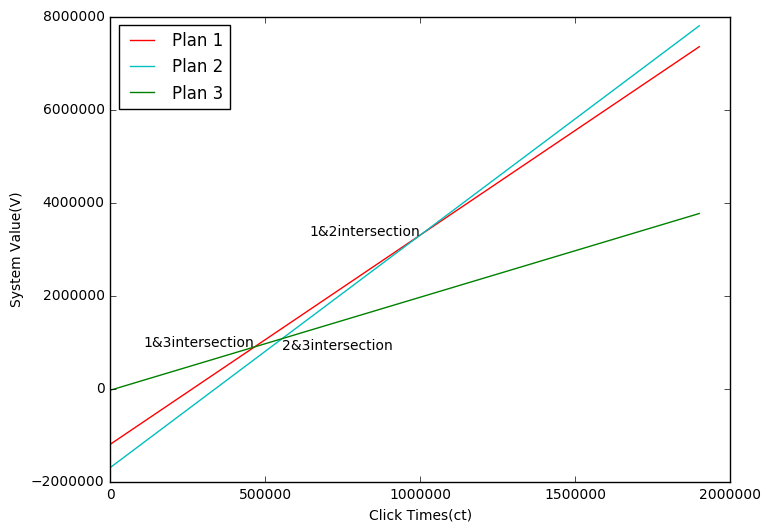

In [6]:
#作图
# myfont = matplotlib.font_manager.FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)
plt.figure(figsize=(8,6))
plt.plot(ct,v1, 'r',label='Plan 1')
plt.plot(ct,v2, 'c',label='Plan 2')
plt.plot(ct,v3, 'g',label='Plan 3')
plt.text(ct12,v12,'1&2intersection',horizontalalignment='right')
plt.text(ct23,v23,'2&3intersection',horizontalalignment='left',verticalalignment='top')
plt.text(ct13,v13,'1&3intersection',horizontalalignment='right')
plt.legend(loc=2)
plt.xlabel('Click Times(ct)')
plt.ylabel('System Value(V)')
plt.show()

## 总结与选择
由于有效购买转化率x对总体趋势影响不大，故此处取5%（可直接修改x值得到具体情况）
>当 **ct** < 465300 时，购买虚拟主机最佳    *（相当于平均每天点击**425**次）*

>当 465300 <= **ct** <= 1000000 时，外包给电子商务公司最佳

>当 **ct** > 1000000时，由公司内部的IT部门自行开发最佳     *（相当于平均每天点击**913**次）*

总的来说，若点击量少，购买虚拟主机更好，若点击量多，由公司内部的IT部门自行开发更好，外包给电子商务公司介于两者之间